# Develop methods to immediately produce batches for ANN training

In [2]:
import Interface as I

/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/model_data_base/distributed_lock.py:11: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


trying to connect to distributed locking server {'config': {'hosts': 'somalogin02-hs:33333'}, 'type': 'zookeeper'}
success!
Current version: heads/master+0.gafe31ed.dirty
Current pid: 144784


/gpfs/soma_fs/scratch/meulemeester/anaconda_isf3/lib/python3.8/site-packages/pandas_msgpack-0.1.4+14.gfcb0471-py3.8-linux-x86_64.egg/pandas_msgpack/packers.py:78: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import (Timestamp, Period, Series, DataFrame,  # noqa


Loading mechanisms:
setting up local multiprocessing framework ... done


Loaded modules with __version__ attribute are:
IPython: 7.19.0, Interface: heads/master+0.gafe31ed.dirty, PIL: 8.2.0, _csv: 1.0, _ctypes: 1.1.0, _curses: b'2.2', _decimal: 1.70, argparse: 1.1, backcall: 0.2.0, blosc: 1.10.2, bluepyopt: 1.9.126, bottleneck: 1.3.2, cffi: 1.14.3, click: 7.1.2, cloudpickle: 1.6.0, colorama: 0.4.4, csv: 1.0, ctypes: 1.1.0, cycler: 0.10.0, cytoolz: 0.11.0, dask: 2.30.0, dateutil: 2.8.1, deap: 1.3, decimal: 1.70, decorator: 4.4.2, distributed: 2.30.1, distutils: 3.8.5, fsspec: 0.8.3, future: 0.18.2, ipykernel: 5.3.4, ipython_genutils: 0.2.0, ipywidgets: 7.5.1, jedi: 0.17.1, jinja2: 2.11.2, joblib: 0.17.0, json: 2.0.9, jupyter_client: 6.1.7, jupyter_core: 4.6.3, kazoo: 2.8.0, kiwisolver: 1.3.0, logging: 0.5.1.2, markupsafe: 1.1.1, matplotlib: 3.3.2, mkl: 2.3.0, neuron: 7.8.2, numexpr: 2.7.1, numpy: 1.19.2, pandas: 1.1.3, pandas_msgpack: 0.1.4+14.gfcb0471.dirty, parameters: 0.2.1, parso: 

/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/Interface.py:183: UserWarning:

The source folder has uncommited changes!



In [52]:
# Dinuka and Chantal's "default" database to test bottleneck models
mdb = I.ModelDataBase('/gpfs/soma_fs/scratch/abast/results/20220829_hot_zone_on_demand_simulations/mdbs_qr8fqtte_/mdb')
mdb = mdb['example_in_distribution_simulation_1ms_INH_adapt_inh_v2.6_shift-3_offset_445_280000_trials']
sorted(mdb[('synapse_activation_binned_v2', '365_505_1', 'EI__section/branch_bin')].listdir())

['batch_0_AP_DEND.npy',
 'batch_0_AP_SOMA.npy',
 'batch_0_ISI_DEND.npy',
 'batch_0_ISI_SOMA.npy',
 'batch_0_SYNAPSE_ACTIVATION.npy',
 'batch_0_SYNAPSE_ACTIVATION_WEIGHTED.npy',
 'batch_0_VT_ALL.npy',
 'batch_0_VT_DEND_ALL.npy',
 'batch_100_AP_DEND.npy',
 'batch_100_AP_SOMA.npy',
 'batch_100_ISI_DEND.npy',
 'batch_100_ISI_SOMA.npy',
 'batch_100_SYNAPSE_ACTIVATION.npy',
 'batch_100_SYNAPSE_ACTIVATION_WEIGHTED.npy',
 'batch_100_VT_ALL.npy',
 'batch_100_VT_DEND_ALL.npy',
 'batch_101_AP_DEND.npy',
 'batch_101_AP_SOMA.npy',
 'batch_101_ISI_DEND.npy',
 'batch_101_ISI_SOMA.npy',
 'batch_101_SYNAPSE_ACTIVATION.npy',
 'batch_101_SYNAPSE_ACTIVATION_WEIGHTED.npy',
 'batch_101_VT_ALL.npy',
 'batch_101_VT_DEND_ALL.npy',
 'batch_102_AP_DEND.npy',
 'batch_102_AP_SOMA.npy',
 'batch_102_ISI_DEND.npy',
 'batch_102_ISI_SOMA.npy',
 'batch_102_SYNAPSE_ACTIVATION.npy',
 'batch_102_SYNAPSE_ACTIVATION_WEIGHTED.npy',
 'batch_102_VT_ALL.npy',
 'batch_102_VT_DEND_ALL.npy',
 'batch_103_AP_DEND.npy',
 'batch_103_AP

In [4]:
mdb.metadata['simresult_path'].keys() #[('synapse_activation_binned_v2', '365_505_1', 'EI__section/branch_bin')].listdir()
# maybe add a key to metadata that tells if it was created with mdb_init, and which init
# there is a simulation init, a batches init

dict_keys(['dumper', 'time', 'metadata_creation_time', 'conda_list', 'module_versions', 'history', 'hostname', 'version', 'full-revisionid', 'dirty', 'error'])

In [5]:
sti = mdb['spike_times'].index[0]
cell = I.simrun_simtrail_to_cell_object(mdb, sti)

/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/single_cell_parser/__init__.py:85: UserWarning:

Keyword scaleFunc is deprecated! New: To ensure reproducability, scaleFunc should be specified in the parameters, as described in single_cell_parser.cell_modify_funs

/gpfs/soma_fs/scratch/meulemeester/project_src/in_silico_framework/single_cell_parser/cell_parser.py:122: UserWarning:

Keyword scaleFunc is deprecated! New: To ensure reproducability, scaleFunc should be specified in the parameters, as described in single_cell_parser.cell_modify_funs

Connection dropped: socket connection broken
Transition to CONNECTING


Session has expired


# Voltage binning

In [17]:
def get_segments_in_section(section_id):
    """Given a section number, this method returns the x value of each segment in this section"""
    xs = [segment.x for segment in cell.sections[section_id]]
    return xs

# if x coordinate of segment is between bin limits, it belongs to that bin

def get_bin_limits(section_id, section_distances_df):
    n_bins = section_distances_df.iloc[section_id]["n_bins"]
    n_bins = 1 if n_bins == 'Soma' else n_bins
    bin_limits = [i/n_bins for i in range(n_bins)]
    bin_limits.append(1)
    return bin_limits

def segments_to_bins(section_id, section_distances_df):
    bins = []
    bin_limits = get_bin_limits(section_id, section_distances_df)
    segments = get_segments_in_section(section_id)
    for segment in segments:
        for bin in range(len(bin_limits)-1):
            if bin_limits[bin] < segment <= bin_limits[bin+1]:
                bins.append(bin)
    return bins

def bin_voltages_in_section(cell, section_id, section_distances_df):
    binned_segments = segments_to_bins(section_id, section_distances_df)
    n_bins = binned_segments[-1]+1
    section = cell.sections[section_id]
    binned_voltages= [None]*n_bins
    voltages = section.recVList
    n_time_points = len(cell.t)
    for bin in range(n_bins):
        segment_idxs = I.np.where([e == bin for e in binned_segments])[0]
        segment_voltage_traces = [voltages[i] for i in segment_idxs]
        max_voltages_in_bin = []
        for t in range(n_time_points):
            max_voltage_in_bin = max([segment_voltage_trace[t] for segment_voltage_trace in segment_voltage_traces])
            max_voltages_in_bin.append(max_voltage_in_bin)
        binned_voltages[bin]=max_voltages_in_bin
    return I.np.array(binned_voltages)


# print(bin_voltages_in_section(cell, 167, section_distances_df))

In [15]:
def get_point_per_bin(section, section_id, section_distances_df):
    """Given a Cell.section object, this method returns one point per spatial bin in this section.
    Useful for plotting.

    Args:
        section (Cell.section): The Cell section
        section_id (int): Index of the section
        section_distances_df (pd.DataFrame): Dataframe describing the amount of spatial bins per section.

    Returns:
        _type_: _description_
    """
    all_points_in_section = section.pts
    n_bins = section_distances_df.iloc[section_id]['n_bins']
    n_bins = 1 if n_bins == "Soma" else n_bins
    jump=len(all_points_in_section)//n_bins
    pts_per_bin = [all_points_in_section[jump*i] for i in range(n_bins)]
    return pts_per_bin

In [8]:
from model_data_base.mdb_initializers.prepare_ANN_batches import get_binsize

def get_section_distances_df_from_cell(cell, spatial_binsize_goal=50):
    """Given a Cell object, produce the section_distances_dataframe, i.e. a DataFrame with the following information:
    - Section indices as index
    - amount of bins per section
    - Size of the bins in this section
    - Min and max distance from soma

    Args:
        cell (Cell): The Cell object
        binsize_goal (int | float): The desired size of the spatial binning. Defaults to 50 microns.

    Returns:
        pd.DataFrame: The section distances dataframe describing size and location of the section, amount of bins and bin sizes
    """
    sections_min_dist = [I.sca.synanalysis.compute_distance_to_soma(sec, 0) for sec in cell.sections]
    sections_max_dist = [I.sca.synanalysis.compute_distance_to_soma(sec, 1) for sec in cell.sections]
    binsize = [get_binsize(length=s_ma-s_mi, binsize_goal=spatial_binsize_goal)[0] if (cell.sections[lv].label != 'Soma') else 'Soma' for lv, (s_mi, s_ma) in enumerate(zip(sections_min_dist, sections_max_dist))]
    n_bins = [get_binsize(length=s_ma-s_mi, binsize_goal=spatial_binsize_goal)[1] if (cell.sections[lv].label != 'Soma') else 'Soma' for lv, (s_mi, s_ma) in enumerate(zip(sections_min_dist, sections_max_dist))]
    # bin_borders = [I.np.linspace(s_mi, s_ma, num = n_bins) if not isinstance(n_bins, str) else 'Soma' for s_mi, s_ma, n_bins in 
    #               zip(sections_min_dist, sections_max_dist, n_bins)]  # unused
    section_distances_df = I.pd.DataFrame({'min_': sections_min_dist, 'max_': sections_max_dist, 'n_bins': n_bins, 'binsize': binsize})
    return section_distances_df

def bin_points_and_voltage(cell, section_distances_df=None, spatial_binsize_goal=50):
    """Given a cell object, this method calculates the binned spatial points and their corresponding voltage traces.

    Args:
        cell (Cell): The cell object

    Returns:
        (pd.Dataframe, np.array): the cell morphology as a pandas dataframe, and a nested numpy array of voltage traces, where axis0 is the spatial bin, and axis1 is time
    """
    section_distances_df = get_section_distances_df_from_cell(cell, spatial_binsize_goal=spatial_binsize_goal) if section_distances_df is None else section_distances_df
    points = []
    vms = []
    for sec_n, sec in enumerate(cell.sections):
        if sec.label in ['AIS', 'Myelin']:
            continue
        pts = get_point_per_bin(sec, sec_n, section_distances_df)
        binned_vms = bin_voltages_in_section(section_distances_df=section_distances_df, section_id=sec_n, cell=cell)
        for i, pt in enumerate(pts):
            # Points within the same section
            x = pt[0]
            y = pt[1]
            z = pt[2]
            d = sec.diamList[i]
            points.append([x, y, z, d, sec_n])
            vms.append(binned_vms[i])
            
    morphology = I.pd.DataFrame(points, columns=['x','y','z','diameter','section'])
    return morphology, I.np.array(vms)

In [9]:
section_distances_df = get_section_distances_df_from_cell(cell)
section_distances_df

,min_,max_,n_bins,binsize
0,0.000000,0.000000,Soma,Soma
1,0.000000,16.346397,1,16.3464
2,16.346397,41.192804,1,24.8464
3,41.192804,168.373734,3,42.3936
4,41.192804,100.616834,1,59.424
...,...,...,...,...
114,37.202526,177.783162,3,46.8602
115,37.202526,221.022591,4,45.955
116,0.000000,20.000000,1,20
117,20.000000,50.000000,1,30


In [18]:
points, binned_voltages = bin_points_and_voltage(cell, section_distances_df)

test if number of bins is the same

In [19]:
print(section_distances_df.iloc[1:-3]["n_bins"].sum() + 1)  # exclude myelin and AIS, add back the soma bin
I.np.array(binned_voltages).shape  # 238 spatial bins x 13802 timepoints

238


(238, 13802)

Let's say the step size in the simulation is 0.025. For 1ms resolution, take every other 40th voltage

In [12]:
binned_voltages[:,::40] # this would be the array we save

array([[-75.        , -75.3163863 , -75.23815758, ..., -70.22565453,
        -70.52584214, -70.8884742 ],
       [-75.        , -75.32481438, -75.25753134, ..., -69.98825726,
        -70.3369982 , -70.73660382],
       [-75.        , -75.35743418, -75.33670632, ..., -68.91055389,
        -69.29542183, -69.86293596],
       ...,
       [-75.        , -75.48614889, -75.85949819, ..., -36.5800708 ,
        -39.05350762, -31.69480963],
       [-75.        , -75.49185348, -75.9212254 , ..., -30.63862315,
        -33.44639711, -30.87711729],
       [-75.        , -75.49258216, -75.94150768, ..., -24.73851706,
        -27.95482405, -28.20625704]])

In [78]:
section_distances_df = get_section_distances_df_from_cell(cell)

def assert_same_stepsize(t_array):
    dts = I.np.ediff1d(t_array)
    I.np.testing.assert_allclose(dts, I.np.mean(dts), err_msg="Stepsizes are not the same!")

def get_voltage_array_from_cell(cell, section_distances_df, min_time, max_time, temporal_resolution=1):
    """_summary_

    Args:
        cell (Cell): _description_
        section_distances_df (pd.DataFrame): _description_
        min_time (float/int): _description_
        max_time (float/int): _description_
        temporal_resolution (int, optional): Required resolution in ms. Defaults to 1 ms.
        spatial_binsize_goal (int | float): Desired size of the spatial bins in micrometer. Defaults to 50µm.

    Returns:
        np.array: 2D array
    """
    assert_same_stepsize(cell.t)
    dt = cell.t[1] - cell.t[0]  # most often 0.025
    every_other_index = int(temporal_resolution / dt)
    if max_time > cell.t[-1]:
        print("Warning: Specified max_time of {0} is larger than simulation time of {1}. Voltage traces can only be calcualted until {1} ms".format(max_time, cell.t[-1]))
    # assert step size of 0.025
    # TODO: redundant if we test for equal stepsize and specify resolution. Test if this can be omitted.
    I.np.testing.assert_almost_equal(cell.t[1], 0.025)
    I.np.testing.assert_almost_equal(cell.t[40], 1)

    _, vms = bin_points_and_voltage(cell, section_distances_df)
    return vms[:,::every_other_index][:,min_time:max_time]

In [79]:
print(cell.t)
get_voltage_array_from_cell(cell, section_distances_df, 0, 445+60, 1).shape

[0.00000e+00 2.50000e-02 5.00000e-02 ... 3.44975e+02 3.45000e+02
 3.45025e+02]


(238, 346)

# synapse activation

In [15]:
from model_data_base.mdb_initializers.prepare_ANN_batches import get_synapse_activation_array_weighted, augment_synapse_activation_df_with_branch_bin, get_spatial_bin_names

Get synaptic activation

In [16]:
sa_ = cell.get_synapse_activation_dataframe()
sa_

,synapse_type,synapse_ID,soma_distance,section_ID,section_pt_ID,dendrite_label,0,1,2,3,...,10,11,12,13,14,15,16,17,18,19
0,L1_B2,0,1091.840740,107,5,ApicalDendrite,978.468095,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,L1_B3,0,1151.063319,99,63,ApicalDendrite,398.793062,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,L1_B3,1,1144.719493,107,25,ApicalDendrite,905.502800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,L1_B4,0,1181.899132,104,41,ApicalDendrite,238.825511,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,L1_C2,0,1149.329748,107,28,ApicalDendrite,119.625449,236.133369,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,VPM_C2,1876,203.393370,115,141,Dendrite,183.261231,913.735965,1075.362194,1138.079887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,VPM_C2,1877,207.103670,115,144,Dendrite,183.261231,516.637736,596.983125,913.735965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,VPM_C2,1878,210.916662,115,147,Dendrite,596.983125,748.618113,1075.362194,1122.427611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,VPM_C2,1879,212.017738,115,148,Dendrite,748.618113,913.735965,1075.362194,1138.079887,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add bin information, section information, cell_type and EI

In [17]:
sa_ = augment_synapse_activation_df_with_branch_bin(sa_, section_distances_df, synaptic_weight_dict=None)
sa_

,synapse_type,synapse_ID,soma_distance,section_ID,section_pt_ID,dendrite_label,0,1,2,3,...,14,15,16,17,18,19,branch_bin,section/branch_bin,celltype,EI
0,L1_B2,0,1091.840740,107,5,ApicalDendrite,978.468095,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,107/1,L1,INH
0,L1_B3,0,1151.063319,99,63,ApicalDendrite,398.793062,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,99/3,L1,INH
0,L1_B3,1,1144.719493,107,25,ApicalDendrite,905.502800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,107/2,L1,INH
0,L1_B4,0,1181.899132,104,41,ApicalDendrite,238.825511,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,104/3,L1,INH
0,L1_C2,0,1149.329748,107,28,ApicalDendrite,119.625449,236.133369,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,107/2,L1,INH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,VPM_C2,1876,203.393370,115,141,Dendrite,183.261231,913.735965,1075.362194,1138.079887,...,NaN,NaN,NaN,NaN,NaN,NaN,4,115/4,VPM,EXC
0,VPM_C2,1877,207.103670,115,144,Dendrite,183.261231,516.637736,596.983125,913.735965,...,NaN,NaN,NaN,NaN,NaN,NaN,4,115/4,VPM,EXC
0,VPM_C2,1878,210.916662,115,147,Dendrite,596.983125,748.618113,1075.362194,1122.427611,...,NaN,NaN,NaN,NaN,NaN,NaN,4,115/4,VPM,EXC
0,VPM_C2,1879,212.017738,115,148,Dendrite,748.618113,913.735965,1075.362194,1138.079887,...,NaN,NaN,NaN,NaN,NaN,NaN,4,115/4,VPM,EXC


In [18]:
selected_stis = [0] # default index if synapse activation df is retrived by cell.get_synapse_activation_dataframe()
min_time = 0
max_time = 445+60
bin_size = 1
spatial_bin_names = get_spatial_bin_names(section_distances_df)
arr = get_synapse_activation_array_weighted(sa_, selected_stis, spatial_bin_names = spatial_bin_names,
                                        min_time = min_time, max_time = max_time, bin_size = bin_size,
                                        use_weights = None)  

In [19]:
arr.shape # trials x celltypes x spatial bins x temporal bins

(1, 2, 260, 505)

Ignore Myelin and AIS

In [20]:
sections_to_keep = [i for i,sec in enumerate(cell.sections) if sec.label in ['Soma', 'Dendrite', 'ApicalDendrite']]

In [21]:
spatial_bin_indices_to_keep = [i for i,sb in enumerate(spatial_bin_names) if int(sb.split('/')[0]) in sections_to_keep]

In [22]:
len(spatial_bin_indices_to_keep)

238

Augment synaptic activation with branch information

In [23]:
syn_weights = None
sa_ = augment_synapse_activation_df_with_branch_bin(sa_, section_distances_df, syn_weights)
weighed_augmented_sa = get_synapse_activation_array_weighted(sa_, selected_stis, spatial_bin_names = spatial_bin_names,
                                        min_time = min_time, max_time = max_time, bin_size = bin_size,
                                        use_weights = syn_weights is not None)    

In [24]:
weighed_augmented_sa[:,:,spatial_bin_indices_to_keep,:].shape

(1, 2, 238, 505)

In [25]:
from model_data_base.mdb_initializers.prepare_ANN_batches import get_synapse_activation_array_weighted, get_spatial_bin_names
def get_synapse_activation_array_from_cell(cell, section_distances_df, 
                                           min_time = None, max_time = None, 
                                           bin_size = None, syn_weights = None):
    if not bin_size == 1:
        raise NotImplementedError()
        
    selected_stis = [0] # default index if synapse activation df is retrived by cell.get_synapse_activation_dataframe()
    #min_time = 0
    #max_time = 445+60
    #bin_size = 1
    spatial_bin_names = get_spatial_bin_names(section_distances_df)
    
    arr = get_synapse_activation_array_weighted(sa_, selected_stis, spatial_bin_names = spatial_bin_names,
                                            min_time = min_time, max_time = max_time, bin_size = bin_size,
                                            use_weights = syn_weights is not None)
    sections_to_keep = [i for i,sec in enumerate(cell.sections) if sec.label in ['Soma', 'Dendrite', 'ApicalDendrite']]
    spatial_bin_indices_to_keep = [i for i,sb in enumerate(spatial_bin_names) if int(sb.split('/')[0]) in sections_to_keep]
    return arr[:,:,spatial_bin_indices_to_keep,min_time:max_time]

In [26]:
get_synapse_activation_array_from_cell(cell, section_distances_df, 0, 445, 1).shape  # n_trials x n_cell_types x n_spatial_bins x n_time_bins

(1, 2, 238, 445)

# Spike times

In [26]:
from biophysics_fitting import get_main_bifurcation_section

In [27]:
sec = get_main_bifurcation_section(cell)

In [28]:
v_dist = I.np.array(sec.recVList[-1])
v_soma = I.np.array(cell.soma.recVList[0])
t = I.np.array(cell.t)

In [29]:
get_synapse_activation_array_weighted(sa_, selected_stis = [0], spatial_bin_names = spatial_bin_names,
                                 min_time = 0, max_time = 600, bin_size = 1, 
                                 use_weights = False)

NameError: name 'get_synapse_activation_array_weighted' is not defined

In [30]:
section_distances_df['label'] = I.pd.Series(section_distances_df.index).apply(lambda x: cell.sections[x].label)

In [31]:
from single_cell_analyzer.membrane_potential_analysis import simple_spike_detection 
# collect spike times for all tirals
soma_AP_times = simple_spike_detection(t, v_soma, mode = 'regular', threshold = 0)
Ca_AP_times = simple_spike_detection(t, v_dist, mode = 'regular', threshold = -30)
soma_AP_times

[15.999999999999625,
 23.724999999999188,
 30.449999999998806,
 165.79999999998614,
 181.62499999997175,
 298.3249999998656,
 319.37499999984647]

In [32]:
# make df for all trials 
Ca_AP_times_df = I.pd.DataFrame(Ca_AP_times).T
soma_AP_times_df = I.pd.DataFrame(soma_AP_times).T

In [33]:
soma_AP_times

[15.999999999999625,
 23.724999999999188,
 30.449999999998806,
 165.79999999998614,
 181.62499999997175,
 298.3249999998656,
 319.37499999984647]

# Put it all together
Run simulation and save binned AP and ISI for Ca-zone and soma, as well as binned voltage traces with 1ms (by default) resolution

In [24]:
def compute_ISI_from_spiketime_list(st, min_time=0, max_time=505, temporal_resolution=1):
    """Given an array of spike times, this method returns a list of size (:@param max_time: - :@param_min_time:)//:@param time_step:,
    where each time step gives the amount of time since the last spike in ms.
    Do not provide a pd.Series or pd.DataFrame here. For that, use :@function model_database.mdb_initialisers.prepare_ANN_batches.compute_ISI_from_st: instead.

    Args:
        st (array): _description_
        min_time (int, optional): Min time of time window in ms. Defaults to 0.
        max_time (int, optional): Max time of time window in ms. Defaults to 505.
        time_step (int, optional): Timestep in ms. Defaults to 1.

    Returns:
        _type_: _description_
    """
    assert type(st) not in (I.pd.DataFrame, I.pd.Series), "This methods is for arrays or lists. When using a pandas Dataframe or Series, use model_database.mdb_initialisers.prepare_ANN_batches.compute_ISI_from_st instead."
    assert type(st) in (list, I.np.array), "Please provide a list or array as spike times."
    st = [e for e in st if min_time <= e <= max_time]
    ISI = []
    for timepoint in I.np.arange(min_time, max_time, temporal_resolution):
        st_ = [e for e in st if e < timepoint]
        if st_:
            max_spike_time_before_timepoint = max(st_)
            ISI.append(timepoint - max_spike_time_before_timepoint)
        else:
            ISI.append(timepoint)
    return ISI

Text(0.5, 1.0, 'ISI - Vertical lines denote a spike')

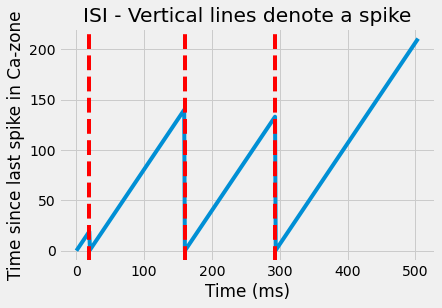

In [41]:
%matplotlib inline
I.plt.style.use('fivethirtyeight')
I.plt.plot(compute_ISI_from_spiketime_list(Ca_AP_times))
for st in Ca_AP_times:
    I.plt.axvline(st, linestyle='--', color='red')
I.plt.xlabel("Time (ms)")
I.plt.ylabel("Time since last spike in Ca-zone")
I.plt.title("ISI - Vertical lines denote a spike")

Main method to rerun an existing simulation from a mdb.

In [59]:
%reload_ext autoreload
%autoreload 2

from Interface import scp, os, dask, np
from simrun2.rerun_mdb import synapse_activation_df_to_roberts_synapse_activation
import time
from model_data_base.mdb_initializers.prepare_ANN_batches import compute_AP_array, compute_ISI_array, spike_times_to_onehot, compute_ISI_from_st_list
from single_cell_analyzer.membrane_potential_analysis import simple_spike_detection 


def _evoked_activity(mdb, stis, outdir,
                     neuron_param_modify_functions = [],
                     network_param_modify_functions = [],
                     synapse_activation_modify_functions = [],
                     additional_network_params = [],
                     recreate_cell_every_run = None,
                     parameterfiles = None,
                     neuron_folder = None,
                     network_folder = None,
                     sa = None,
                     temporal_resolution=1,
                     min_time=0, max_time=445+60):
    """This method runs simulations defined by the given arguments.
    For each entry in stis, a trial is run.
    The following data is then converted to a batch format with coarse resolution, optimised for ANN training:
    - Voltage traces at each spatial bin

    Args:
        mdb (_type_): _description_
        stis (_type_): _description_
        outdir (_type_): _description_
        neuron_param_modify_functions (list, optional): _description_. Defaults to [].
        network_param_modify_functions (list, optional): _description_. Defaults to [].
        synapse_activation_modify_functions (list, optional): _description_. Defaults to [].
        additional_network_params (list, optional): _description_. Defaults to [].
        recreate_cell_every_run (_type_, optional): _description_. Defaults to None.
        parameterfiles (_type_, optional): _description_. Defaults to None.
        neuron_folder (_type_, optional): _description_. Defaults to None.
        network_folder (_type_, optional): _description_. Defaults to None.
        sa (_type_, optional): _description_. Defaults to None.
        temporal_resolution (int, optional): _description_. Defaults to 1.
        min_time (int, optional): _description_. Defaults to 0.
        max_time (_type_, optional): _description_. Defaults to 445+60.

    Raises:
        NotImplementedError: _description_
        NotImplementedError: _description_
    """
    print('saving to ', outdir)
    import neuron
    h = neuron.h
    sti_bases = [s[:s.rfind('/')] for s in stis]
    if not len(set(sti_bases)) == 1:
        raise NotImplementedError
    sti_base = sti_bases[0]
    sa = sa.content
    print('start loading synapse activations')
    sa = sa.loc[stis].compute(get = dask.get)
    print('done loading synapse activations')    
    sa = {s:g for s,g in sa.groupby(sa.index)}
    
    outdir_absolute = os.path.join(outdir, sti_base)
    if not os.path.exists(outdir_absolute):
        os.makedirs(outdir_absolute)
    
    parameterfiles = parameterfiles.loc[stis]
    parameterfiles = parameterfiles.drop_duplicates()
    if not len(parameterfiles) == 1:
        raise NotImplementedError()
        
    neuron_name = parameterfiles.iloc[0].hash_neuron
    neuron_param = scp.build_parameters(neuron_folder.join(neuron_name))
    network_name = parameterfiles.iloc[0].hash_network
    network_param = scp.build_parameters(network_folder.join(network_name)) 
    additional_network_params = [scp.build_parameters(p) for p in additional_network_params]
    for fun in network_param_modify_functions:
        network_param = fun(network_param)
    for fun in neuron_param_modify_functions:
        neuron_param = fun(neuron_param)
            
    scp.load_NMODL_parameters(neuron_param)
    scp.load_NMODL_parameters(network_param)    
    cell = scp.create_cell(neuron_param.neuron, scaleFunc=None)
    
    bifur_sec = get_main_bifurcation_section(cell)
    #vTraces = []
    #tTraces = []
    #recordingSiteFiles = neuron_param.sim.recordingSites
    #recSiteManagers = []
    #for recFile in recordingSiteFiles:
    #    recSiteManagers.append(sca.RecordingSiteManager(recFile, cell))
    
    section_distances_df = get_section_distances_df_from_cell(cell)
    
    if max_time is not None:
        neuron_param.sim.tStop = max_time
    
    v_soma_list = []
    v_dend_list = []
    sa_arr_list = []   
    VT = []
    for lv, sti in enumerate(stis):
        # Loop over stimulus trials.
        start_time = time.time()

        #-------------- Setup network --------------#
        ## Fetch synaptic input
        ## sti_number = int(sti[sti.rfind('/')+1:])  # unused
        syn_df = sa[sti]
        
        for fun in synapse_activation_modify_functions:  # adapt synaptic activation if specified
            syn_df = fun(syn_df)
            
        syn = synapse_activation_df_to_roberts_synapse_activation(syn_df)
        
        ## Calculate evoked activity in cell from synaptic activation.
        evokedNW = scp.NetworkMapper(cell, network_param.network, neuron_param.sim)
        evokedNW.reconnect_saved_synapses(syn)
        additional_evokedNWs = [scp.NetworkMapper(cell, p.network, neuron_param.sim) for p in additional_network_params]
        for additional_evokedNW in additional_evokedNWs:
            additional_evokedNW.create_saved_network2()
        stopTime = time.time()
        setupdt = stopTime - start_time
        print('Network setup time: {:.2f} s'.format(setupdt))
                
        # synTypes = list(cell.synapses.keys())  # unused
        # synTypes.sort()  # unused
        
        #-------------- Run simulation --------------#
        print('Testing evoked response properties run {:d} of {:d}'.format(lv+1, len(stis)))
        tVec = h.Vector()
        tVec.record(h._ref_t)
        start_time = time.time()
        scp.init_neuron_run(neuron_param.sim, vardt=False) #trigger the actual simulation
        stopTime = time.time()
        simdt = stopTime - start_time
        print('NEURON runtime: {:.2f} s'.format(simdt))
        
        # vmSoma = np.array(cell.soma.recVList[0])  # unused
        t = np.array(tVec)
        cell.t = t  # Extract time vector

        #-------------- Extract and save relevant data --------------#
        # - Voltage traces at each spatial bin
        # - Synaptic activation for this trial
        sa_arr = get_synapse_activation_array_from_cell(cell, section_distances_df, min_time=min_time, max_time=max_time, bin_size=temporal_resolution, syn_weights=syn_weights)   
        vts = get_voltage_array_from_cell(cell, section_distances_df, min_time=min_time, max_time=max_time, temporal_resolution=temporal_resolution)
        v_dend = I.np.array(bifur_sec.recVList[-1])
        v_soma = I.np.array(cell.soma.recVList[0])
        # vts_dend.append(v_dist)
        # vts_soma.append(v_soma)
        v_soma_list.append(v_soma)
        v_dend_list.append(v_dend)
        sa_arr_list.append(sa_arr)
        VT.append(vts)
        #-------------- Re-initialise everything for next trial --------------#
        cell.re_init_cell()
        evokedNW.re_init_network()
        for additional_evokedNW in additional_evokedNWs:
            additional_evokedNW.re_init_network()

        print('-------------------------------')
    
    # WARNING: this is the dt of the cell that was last run. TODO: is this always the same dt in this loop?
    #-------------- Transform data to ANN batch format --------------#
    v_soma_df = I.pd.DataFrame(v_soma_list).T
    v_dend_df = I.pd.DataFrame(v_dend_list).T
    # collect spike times for all trials
    time_points = cell.t
    soma_AP_times = [simple_spike_detection(time_points, v_soma_df[trial], mode = 'regular', threshold = 0) for trial in range(v_dend_df.shape[1])]
    dend_AP_times = [simple_spike_detection(time_points, v_dend_df[trial], mode = 'regular', threshold = -30) for trial in range(v_dend_df.shape[1])]
    # Transform to ISI lists and one-hot encoded AP
    AP_DEND = [spike_times_to_onehot(spike_times, min_time, max_time, temporal_resolution) for spike_times in dend_AP_times]
    ISI_DEND = [compute_ISI_from_st_list(spike_times, min_time, max_time, temporal_resolution) for spike_times in dend_AP_times]
    AP_SOMA = [spike_times_to_onehot(spike_times, min_time, max_time, temporal_resolution) for spike_times in soma_AP_times]
    ISI_SOMA = [compute_ISI_from_st_list(spike_times, min_time, max_time, temporal_resolution) for spike_times in soma_AP_times]
    SA = I.np.concatenate(sa_arr_list, axis = 0)
    VT = VT
    #-------------- Save as .npy format --------------#
    I.np.save(os.path.join(outdir, "AP_DEND.npy"), AP_DEND)
    I.np.save(os.path.join(outdir, "ISI_DEND.npy"), ISI_DEND)
    I.np.save(os.path.join(outdir, "AP_SOMA.npy"), AP_SOMA)
    I.np.save(os.path.join(outdir, "ISI_SOMA.npy"), ISI_SOMA)
    I.np.save(os.path.join(outdir, "SA.npy"), SA)
    I.np.save(os.path.join(outdir, "VT.npy"), VT)

In [36]:
class Opaque:
    
    def __init__(self, content):
        self.content = content

Wrapper method to rerun simulation from an existing simulation mdb.

In [42]:
from Interface import silence_stdout
from biophysics_fitting.utils import execute_in_child_process

def rerun_mdb(mdb, outdir,
                     neuron_param_modify_functions = [],
                     network_param_modify_functions = [],
                     synapse_activation_modify_functions = [], 
                     stis = None,
                     silent = False,
                     additional_network_params = [],
                     child_process = False,
                     temporal_resolution=1,
                     min_time=0, max_time=445+60):
    '''
    mdb: model data base initialized with I.mdb_init_simrun_general to be resimulated
    outdir: location where simulation files are supposed to be stored
    tStop: end of simulation
    neuron_param_modify_functions: list of functions which take a neuron param file and may return it changed
    network_param_modify_functions: list of functions which take a network param file and may return it changed
    synapse_activation_modify_functions: list of function, which take a synapse activation dataframe and may return it changed
    stis: sim_trial_indices which are to be resimulated. If None, the whole database is going to be resimulated.
    silent: suppress output to stdout
    child_process: run simulation in child process. This can help if dask workers time out during the simulation.
    recreate_cell_every_run: set to True if you use synapse_activation as cell modify function.'''
    parameterfiles = mdb['parameterfiles']
    neuron_folder = mdb['parameterfiles_cell_folder']
    network_folder = mdb['parameterfiles_network_folder']
    sa = mdb['synapse_activation'] 
    # without the opaque object, dask tries to load in the entire dataframe before passing it to _evoked_activity
    sa = Opaque(sa)
    if stis is not None:
        parameterfiles = parameterfiles.loc[stis]
    sim_trial_index_array = parameterfiles.groupby('path_neuron').apply(lambda x: list(x.index)).values
    delayeds = []
    
    myfun = _evoked_activity
    
    if silent:
        myfun = silence_stdout(myfun)
    
    if child_process:
        myfun = execute_in_child_process(myfun)
    
    myfun = dask.delayed(myfun)
    print('outdir is', outdir)
    for stis in sim_trial_index_array:
        d = myfun(mdb, stis, outdir,
                  neuron_param_modify_functions = neuron_param_modify_functions,
                  network_param_modify_functions = network_param_modify_functions,
                  synapse_activation_modify_functions = synapse_activation_modify_functions,
                  parameterfiles = parameterfiles.loc[stis],
                  neuron_folder = neuron_folder,
                  network_folder = network_folder,
                  sa = sa,
                  additional_network_params = additional_network_params,
                  temporal_resolution=temporal_resolution,
                  min_time=min_time, max_time=max_time)
        delayeds.append(d)
    return delayeds

# Test run

In [62]:
stis = mdb['spike_times'].index[0:2]
stis

Index(['results/20220906-0524_seed1051297968_pid66212/000000', 'results/20220906-0524_seed1051297968_pid66212/000001'], dtype='object', name='sim_trail_index')

In [63]:
outdir = '/gpfs/soma_fs/scratch/meulemeester/results/simrun2/test_'
delayeds = rerun_mdb(mdb, stis=stis, outdir=outdir)

outdir is /gpfs/soma_fs/scratch/meulemeester/results/simrun2/test_


In [ ]:
I.dask.compute(delayeds, scheduler="synchronous")
# Should produce .npy files in output dir

# Test the results

In [43]:
I.np.load("/gpfs/soma_fs/scratch/meulemeester/results/simrun2/test_/VT.npy").shape
# n_trials x n_spatial_bins x n_time_points

(2, 238, 505)

In [45]:
# load batch generated from simulation
batch_soma_ISI = I.np.load(mdb[('synapse_activation_binned_v2', '365_505_1', 'EI__section/branch_bin')].join('batch_0_ISI_SOMA.npy'))
simrun2_soma_ISI = I.pd.DataFrame(I.np.load("/gpfs/soma_fs/scratch/meulemeester/results/simrun2/test_/ISI_SOMA.npy"))
# test if the last 140ms of both batches are the same
I.np.testing.assert_almost_equal(I.pd.DataFrame(batch_soma_ISI).iloc[0].values[-140:], simrun2_soma_ISI.iloc[0].values[-140:])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


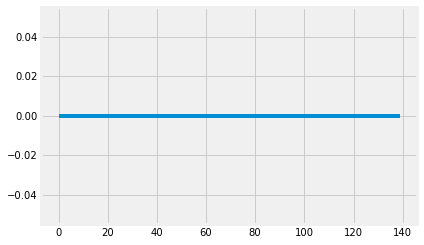

In [46]:
%matplotlib inline
diff = [abs(a -b)/a for a, b in zip(I.pd.DataFrame(batch_soma_ISI).iloc[0].values[-140:], simrun2_soma_ISI.iloc[0].values[-140:])]
print(diff)
I.plt.plot(diff)
# yep, that's the same

In [55]:
# load batch generated from simulation
batch_soma_AP = I.np.load(mdb[('synapse_activation_binned_v2', '365_505_1', 'EI__section/branch_bin')].join('batch_0_AP_SOMA.npy'))
simrun2_soma_AP = I.pd.DataFrame(I.np.load("/gpfs/soma_fs/scratch/meulemeester/results/simrun2/test_/AP_SOMA.npy"))
# test if the last 140ms of both batches are the same
I.np.testing.assert_equal(I.pd.DataFrame(batch_soma_AP).iloc[0].values[-140:], simrun2_soma_AP.iloc[0].values[-140:])

In [54]:
# load batch generated from simulation
batch_DEND_AP = I.np.load(mdb[('synapse_activation_binned_v2', '365_505_1', 'EI__section/branch_bin')].join('batch_0_AP_DEND.npy'))
simrun2_DEND_AP = I.pd.DataFrame(I.np.load("/gpfs/soma_fs/scratch/meulemeester/results/simrun2/test_/AP_DEND.npy"))
# test if the last 140ms of both batches are the same
I.np.testing.assert_equal(I.pd.DataFrame(batch_DEND_AP).iloc[0].values[-140:], simrun2_DEND_AP.iloc[0].values[-140:])

AssertionError: 
Arrays are not equal

Mismatched elements: 2 / 140 (1.43%)
 x: array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,...
 y: array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,...

Dendritic spike according to simulation is at 45 ms
Dendritic spike according to simrun2 method developed here is at 40 ms


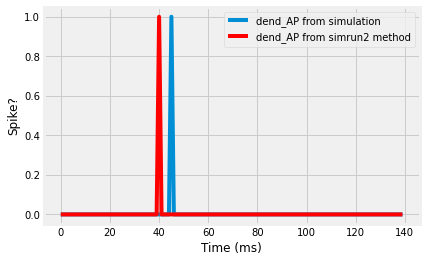

In [68]:
I.plt.plot(I.pd.DataFrame(batch_DEND_AP).iloc[0].values[-140:], label="dend_AP from simulation")
I.plt.plot(simrun2_DEND_AP.iloc[0].values[-140:], color="red", label="dend_AP from simrun2 method")
I.plt.legend()
I.plt.xlabel("Time (ms)")
I.plt.ylabel("Spike?")
print("Dendritic spike according to simulation is at {} ms".format(I.np.where(I.pd.DataFrame(batch_DEND_AP).iloc[0].values[-140:])[0][0]))
print("Dendritic spike according to simrun2 method developed here is at {} ms".format(I.np.where(simrun2_DEND_AP.iloc[0].values[-140:])[0][0]))